In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
heart = pd.read_csv('heart_disease_dataset.csv', sep = ',')

# Opis kolumn

In [3]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


**age** 
    
    age of patient
**sex** 

    1=male; 0=female
**cp** 

    chest pain type: 1=typical angina; 2=atypical angine; 3=non-anginal pain; 4=asymptomatic
**trestbps** 

    resting blood pressure (mm Hg)
**chol** 

    serum cholestrol (mg/dl)
**fbs** 
    
    fasting blood sugar: 1 if > 120 mg/dl; 0 otherwise
**restecg** 

    resting electrocardiographic results: 0=normal; 1=having ST-T wave abnormality; 2=showing probable or definite left 
**ventricular**
    
    hypertrophy
**thalach** 

    maximum heart rate achieved
**exang** 

    exercise induced angina: 1=yes; 0=no
**oldpeak** 

    ST depression induced by exercise relative to rest
**slope** 

    the slope of the peak exercise ST segment: 1=upsloping; 2=flat; 3=downsloping
**ca** 

    number of major vessels (0-3) colored by flourosopy
**thal** 

    3=normal; 6=fixed defect; 7=reversable defect
**num** 

    predicted attribute; 0=HEART DISEASE; 1=NO HEART DISEASE

# Podstawowa analiza kolumn

In [4]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
num           int64
dtype: object

In [5]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,-1319.468647,-655.363036,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,11432.566205,8111.366638,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-100000.000000,-100000.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [6]:
data_na_perc = heart.count(axis = 0) / (heart.count(axis = 0) + heart.isnull().sum(axis = 0))
all_data = pd.DataFrame(data_na_perc).reset_index()
all_data.columns = ['variable','non_missing_proc']
all_data

,variable,non_missing_proc
0,age,1.0
1,sex,1.0
2,cp,1.0
3,trestbps,1.0
4,chol,1.0
5,fbs,1.0
6,restecg,1.0
7,thalach,1.0
8,exang,1.0
9,oldpeak,1.0


Mimo że braki nie zostały zaspisane jako NA to wartości -100000.000000 budzą wątpliwości, więc zastąpię je modą danej kolumny.

In [7]:
heart["ca"].replace({-100000: int(heart.mode()['ca'][0])}, inplace=True)
heart["thal"].replace({-100000: int(heart.mode()['thal'][0])}, inplace=True)
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


# Badanie zmiennej celu

Zmienną celu jest ostatnia kolumna num, mówiąca czy przewidujemy dla danego pacjenta choroby serca. Jest ona kategoryczna o dwóch wartościach, więc najciekawsze będzie zestawienie jej z innymi zmiennymi.

# Badanie rozkładu zmiennych numerycznych 

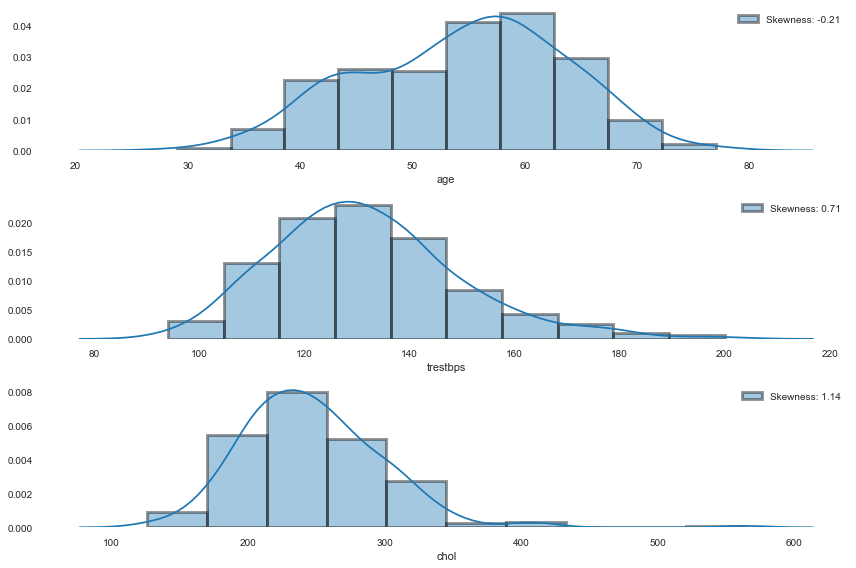

In [8]:
num = ['age','trestbps','chol']


fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))
axes = axes.flatten()
for idx, ax in enumerate(axes):
    plt.sca(ax)
    current_series = heart[num[idx]]
    ax = sns.distplot(current_series, bins=10, hist_kws={'edgecolor': 'black', 'linewidth': 3},
                      label=f'Skewness: {current_series.skew():.2f}')
    ax.legend()
sns.despine()
plt.tight_layout()
plt.show()

# Badanie korelacji zmiennych 

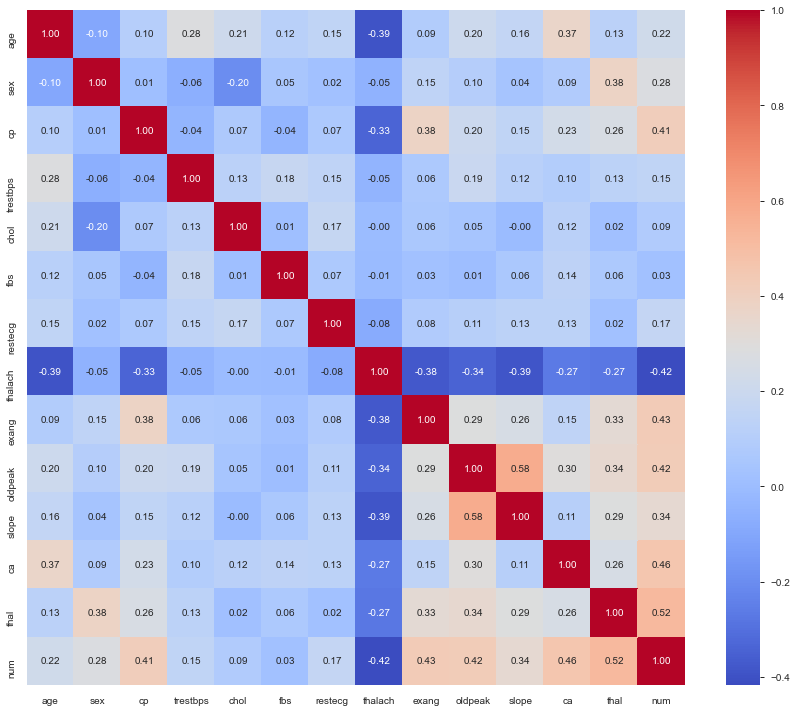

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(heart.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.tight_layout()
plt.show()

Można zauważyć, że zmienna celu ma sporą zależność od kolumny cp, exang, oldpeak, ca i thal.

# Pakiet Pandas Profiling

In [10]:
profile = ProfileReport(heart, title='Heart Disease Report', html={'style':{'full_width':True}})
profile.to_widgets()

Pakiet Pandas Profiling jest przydatny do wstępnej analizy i zorientowania się w danych. Wywołując jedną komendę możemy dowiedzieć się naprawdę dużo o zbiorze. Jednak do dokładnej analizy nie można polegać tylko na automatycznym raporcie i trzeba manualnie sprawdzić interesujące zależności.